# **힙 튜플 작성**
- 단 하나의 힙 튜플을 포함하는 하나의 페이지로 구성된 테이블을 가정.
- 이 페이지의 pd_lower는 첫 번째 라인 포인터를 가리키고 라인 포인터와 pd_upper는 모두 첫 번째 힙 튜플을 가리킴.

- 두 번째 튜플이 삽입되면 첫 번째 튜플 뒤에 배치.
- 두 번째 라인 포인터는 첫 번째 라인 포인터에 추가되고 두 ​​번째 튜플을 가리킴.
- pd_lower는 두 번째 줄 포인터를 가리키도록 변경되고, pd_upper는 두 번째 힙 튜플을 가리킴.
- 이 페이지 내의 다른 헤더 데이터(예: pd_lsn, pg_checksum, pg_flag)도 적절한 값으로 업데이트

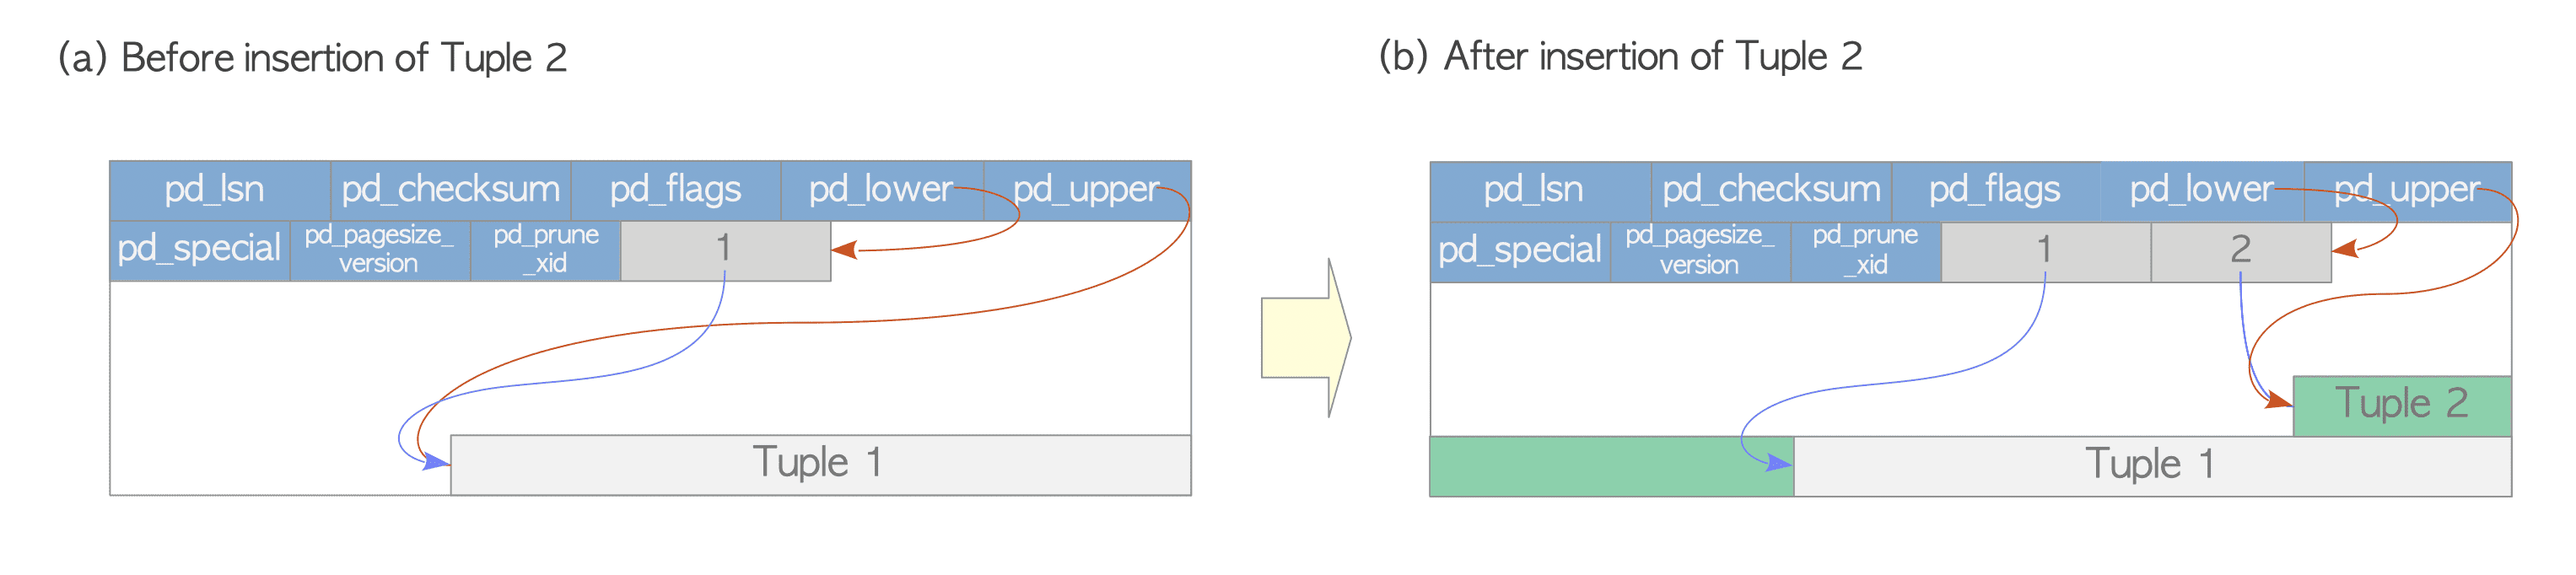

# **힙 튜플 읽기**

- 두 가지 일반적인 액세스 방법

**순차 스캔**
- 각 페이지의 모든 라인 포인터를 스캔하여 모든 페이지의 모든 튜플을 순차적으로 읽음

**B-트리 인덱스 스캔**
- 인덱스 튜플을 포함하는 인덱스 파일을 읽음.
  - 각 인덱스 튜플은 인덱스 키와 대상 힙 튜플을 가리키는 TID로 구성
- 찾고 있는 키가 포함된 인덱스 튜플을 찾은 경우 1 PostgreSQL은 얻은 TID 값을 사용하여 원하는 힙 튜플을 읽음.
- 예를 들어, 획득된 인덱스 튜플의 TID 값은 '(block = 7, Offset = 2)'.
  - 이는 대상 힙 튜플이 테이블 내 7번째 페이지의 두 번째 튜플이므로 PostgreSQL이 페이지에서 불필요한 스캔 없이 원하는 힙 튜플을 읽을 수 있음을 의미.

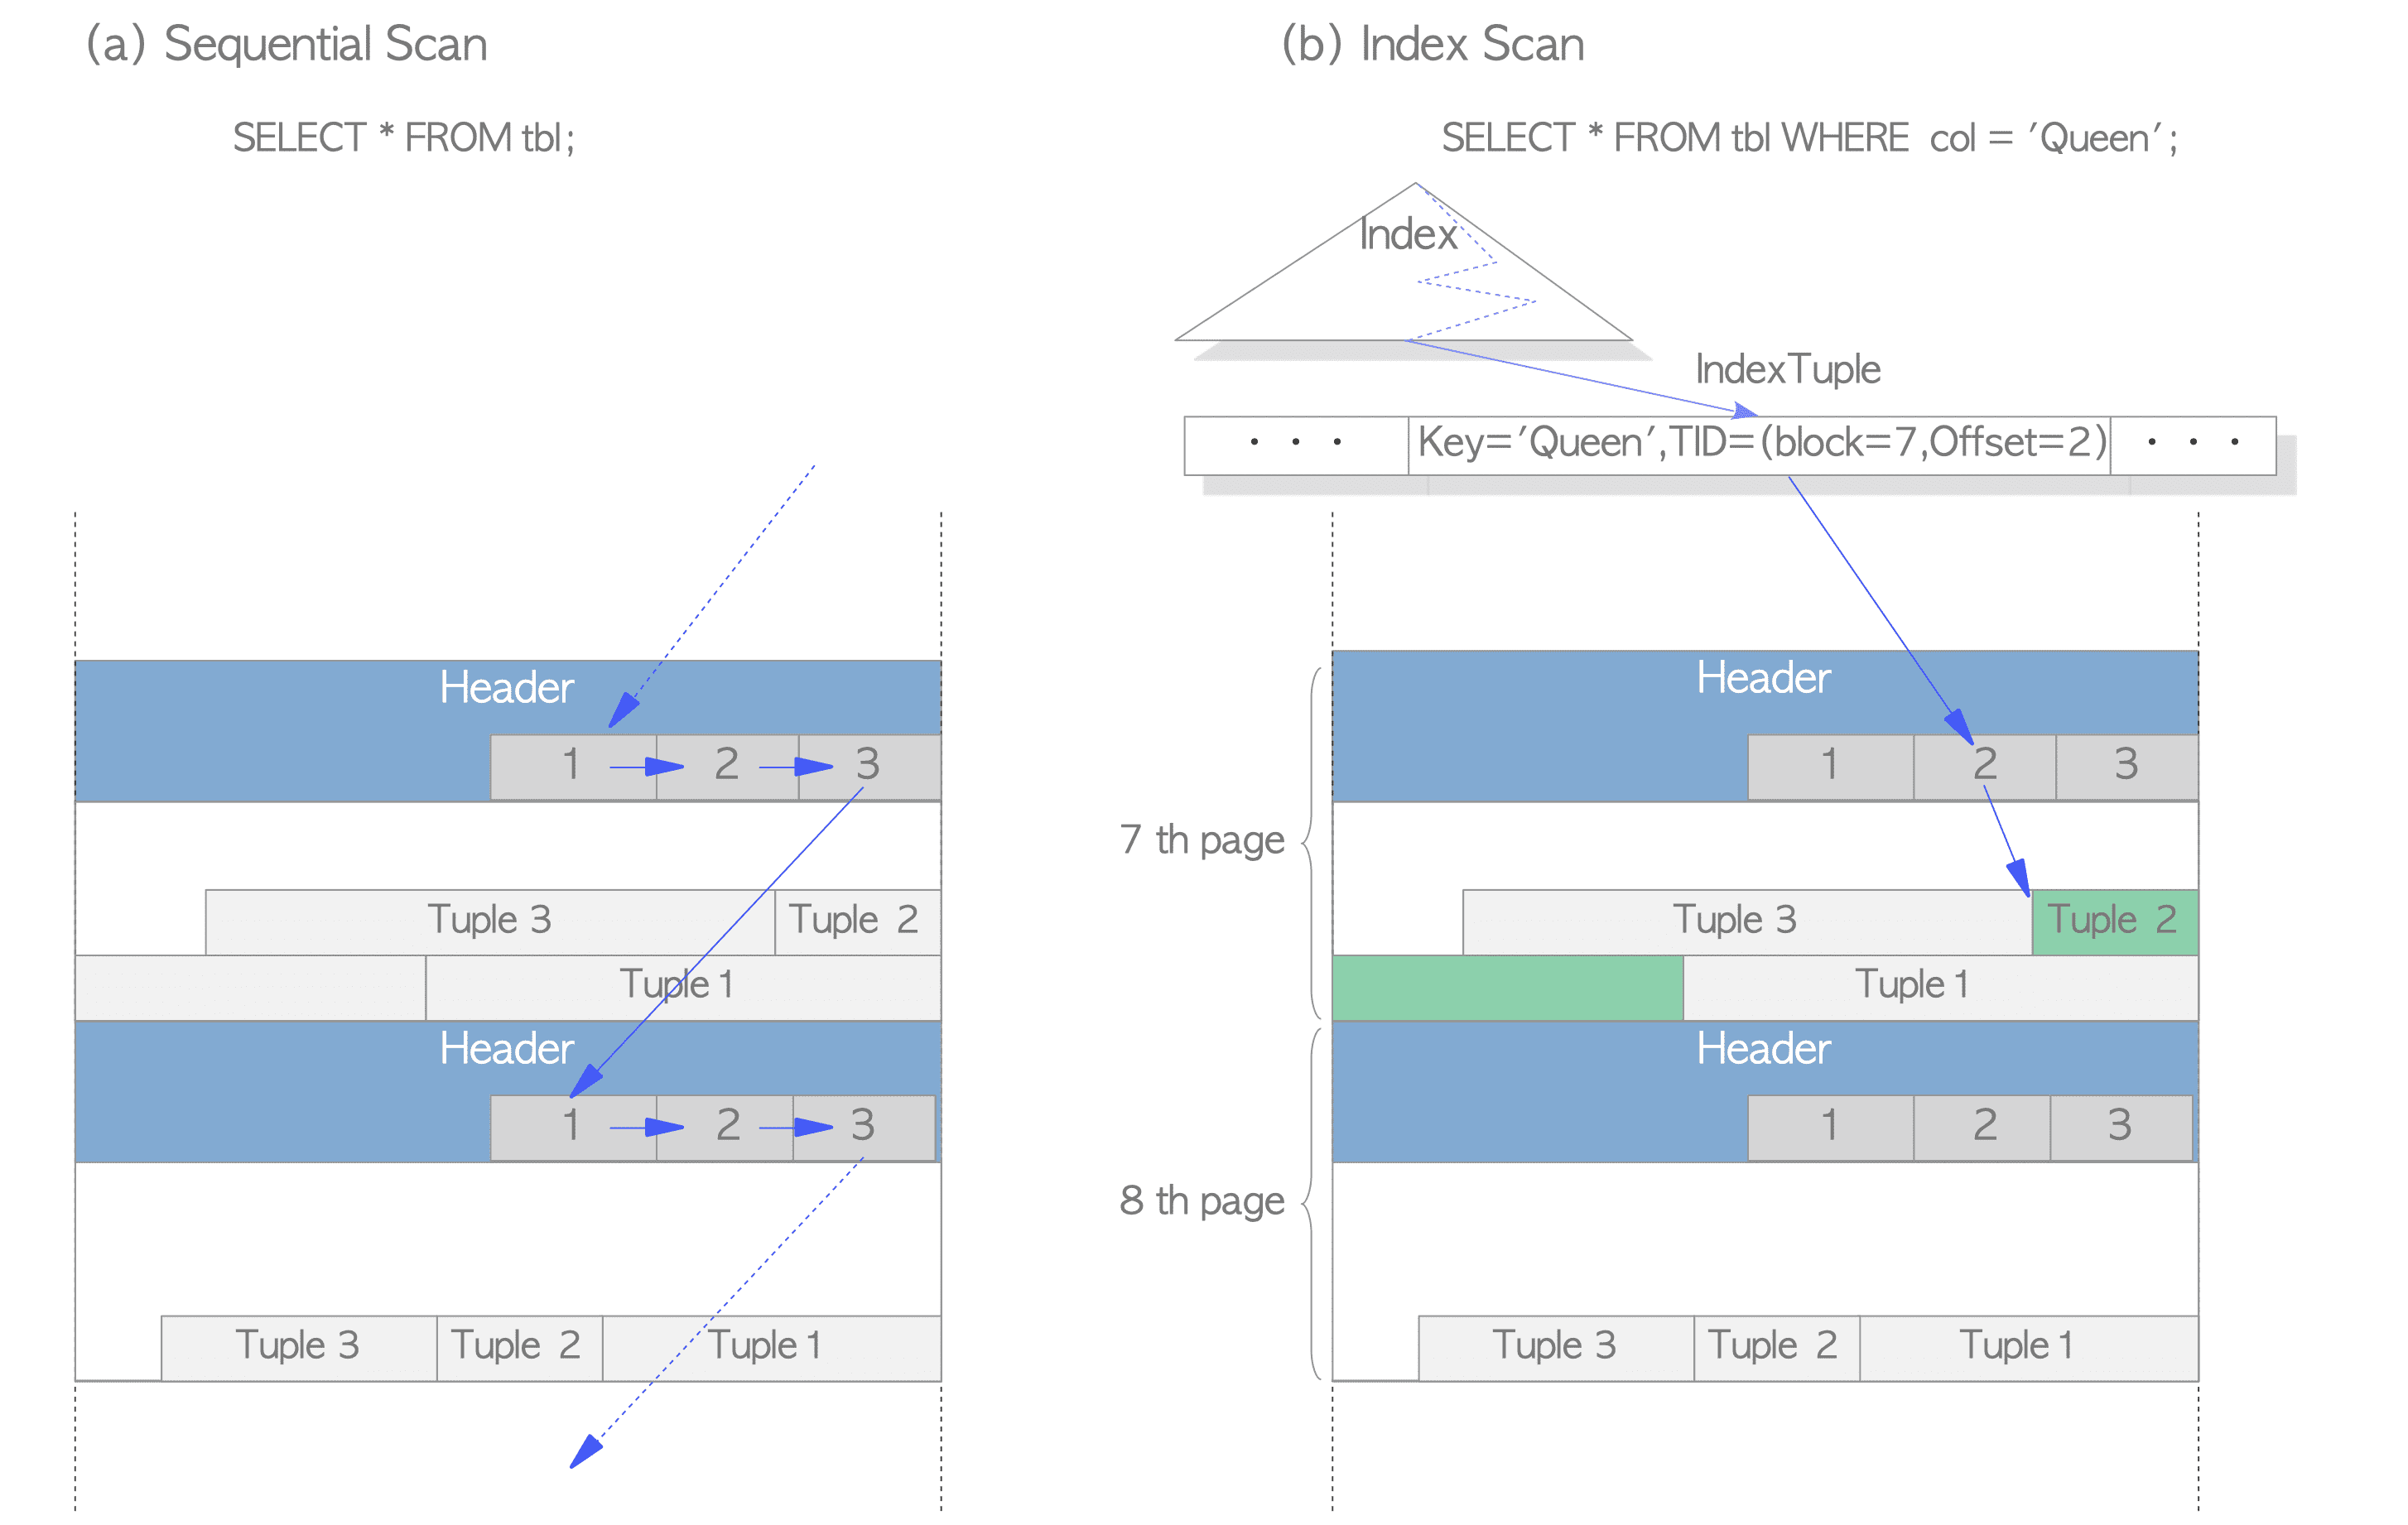

- PostgreSQL은 TID-Scan, Bitmap-Scan 및 Index-Only-Scan도 지원

- TID-Scan은 원하는 튜플의 TID를 이용하여 튜플에 직접 접근하는 방식.
  -  예를 들어, 테이블 내 0번째 페이지에서 첫 번째 튜플을 찾으려면 다음 쿼리를 실행.



```
sampledb=# SELECT ctid, data FROM sampletbl WHERE ctid = '(0,1)';
 ctid  |   data
-------+-----------
 (0,1) | AAAAAAAAA
(1 row)
```